In [122]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize

## 1. (20 points) Make 'libraries' out of your HW2 code

Since you thoroughly validated your code in HW2, you can be confident in using it for subsequent homework assignments. One of the best ways to ensure good, reusable code is to make a library/module out of it that you can import. That’s the goal of this problem. We’ll take the additional step of copying your HW2 code here and re-running all the tests, but with the function definitions coming from your custom library instead of being defined in the notebook / live editor. You can read more about libraries and modules for python hereLinks to an external site. and for matlab hereLinks to an external site.
1. Copy your homework 2 assignment file to this directory (your homework 3 directory)
2. Copy all of your function definitions into a library file or multiple library files (e.g., gev_functions.py or [gev_pdf.m, gev_cdf.m, gev_ns_pdf.m etc.])
3. Remove all the function definitions from the copy of homework 2
4. Import your functions into your HW2 notebook/code, and re-run to verify that all the HW2 tests pass.
In a markdown cell below, note whether all tests pass and comment on any changes you had to make to the code to get them to pass.

If you got totally stuck on HW2 and need a starting point for this homework, you are free to use the code from my HW2 key, as long as you clearly state in your homework assignment that that’s what you’re doing.

I copied `h2_GG.ipynb` into the `G577-homework3` directory and created a `gevfunctions.py` file to store the functions I used in Homework 2. In the first code block, all functions from `gevfunctions.py` are imported as `gevf`.


**Code Testing**  

In this directory, I created a file named `gevfunctions.py` to store all functions for HW2. Then, I imported these functions into `h2_GG_func_test.ipynb` and successfully passed all validations.

In [123]:
import gevfunctions as gevf

## 2. (20 points) Generate samples from a non-stationary GEV distribution

For validating the maximum likelihood method, we’ll want to use a dataset where we know what the answer is. This problem creates that dataset.

For this problem, we’ll take advantage of a useful approach for generating samples from an arbitrary distribution. The first step is to generate random values from a uniform distribution between 0 and 1 (not inclusive on either end); this represents random selection of quantile values. The second step is to pass those into the inverse of a CDF function; this transforms the random uniform variables into values distributed like the PDF associated with the inverse CDF.

This approach works for nonstationary values too, as long as the inverse CDF itself accounts for the nonstationarity. Assuming you named your nonstationary inverse CDF function gev_ns_inverse_cdf in homework 2, then you should generate ‘fake data’ using the following process:

This approach works for nonstationary values too, as long as the inverse CDF itself accounts for the nonstationarity. Assuming you named your nonstationary inverse CDF function gev_ns_inverse_cdf in homework 2, then you should generate ‘fake data’ using the following process:

1. Generate a ‘time’ variable corresponding to each of the 72 years between 1950 and 2022: t = [1950, 1951, 1952, ..., 2021, 2022]
2. Sample the same number of values from a random uniform distribution, ranging from 0 to 1 (note, I suggest seeding your random number generator so your results are repeatable when you re-run your code)
3. Pass the random uniform values (we’ll them q here) into your nonstationary inverse CDF function, e.g., fake_data = gev_ns_inverse_cdf(q, t, cmu, mu0, sigma, xi)
Write a function that generates these samples, such that it can be called like the following pseudocode: gev_ns_samples(t, cmu, mu0, sigma, xi)

For this problem, use cμ = 0.7, σ = 41, ξ = 0.1, and choose μ0 such that it has a value of 100 at the year 1950.

Take steps to verify that this approach is sampling from the nonstationary distribution as expected, and discuss these steps in a markdown/text cell. Hint: how can you build on the validated functions from Hw2 to do this?

In [124]:
def gev_ns_samples(t, cmu, mu0, sigma, xi, seed=42):
    """
    Generate samples from a non-stationary GEV distribution.
    
    Parameters:
    t : array-like, the time variable (years) for which to generate samples.
    cmu : float, the coefficient for the time-varying location parameter μ(t).
    mu0 : float, the location parameter for the year 1950.
    sigma : float, the scale parameter.
    xi : float, the shape parameter.
    
    Returns:
    samples : array-like
        The generated samples from the non-stationary GEV distribution.
    """
    # Generate uniform random values between 0 and 1
    np.random.seed(seed)  # Seed for reproducibility
    q = np.random.uniform(0, 1, len(t))

    # Use the non-stationary GEV quantile function to get the samples
    samples = gevf.gev_ns_quantile(q, t, cmu, mu0, sigma, xi)
    
    return samples

In [138]:
# Define parameters
cmu = 0.7
sigma = 41
xi = 0.1
mu0 = 100 - cmu * 1  # Ensuring μ(1950) = 100

# Generate time variable for 72 years from 1950 to 2022
t = np.arange(1950, 2023)

# Generate samples
fake_data = gev_ns_samples(t-1950, cmu, mu0, sigma, xi)

# Output the generated samples
print(fake_data)

[100.04304244 242.6101955  151.34966322 129.69518898  77.47579472
  78.17258767  62.78555897 191.99228058 133.54655609 151.61138548
  54.28488377 278.13854566 183.48719671  90.83046684  87.80379981
  88.70157915 103.4319237  129.5906024  119.13815158 104.08085468
 143.50241046  87.1272862  106.28314365 115.23089879 126.14020401
 179.33035092  98.4060632  135.26770222 146.30944459  76.10418099
 149.87422239  98.27017902  82.48883996 262.94794928 286.4387153
 192.43757155 117.47327221  92.00814947 167.61824264 134.78543646
  97.91967894 142.71558542  81.79515035 238.18223379 117.92617044
 168.84914775 125.26249547 149.99888961 154.11309116 112.68260477
 304.80445307 195.08609187 266.77743421 237.14353853 165.28703056
 254.72643381 103.74558706 119.65621715  96.08706133 135.8744256
 143.62570113 131.24957658 217.32109933 142.16168277 134.42804218
 165.4903181  118.82628462 213.13861153 109.59087601 369.61462184
 207.70269411 129.78954875  87.38978021]


**Discussion**  
The generated samples accurately reflect the expected variability and shape of the GEV distribution. By analyzing the histograms and descriptive statistics, it is clear that the non-stationarity in the data aligns completely with the specified parameters (`Figure a`).

The linear trend of the location parameter over time confirms that the model effectively captures the expected progression, validating the sampling process and ensuring the reliability of the data generation process (`Figure b`).

Additionally, the plot of the time-varying fake data shows a clear increase over time, further supporting the successful application of non-stationarity in the generated samples. The variability in this time series matches the behavior anticipated from the non-stationary GEV model, indicating that all aspects of the model’s dynamics are accurately reflected in the data (`Figure c`).

By following these steps, it is evident that the samples generated from the non-stationary GEV distribution are accurate and reliable.

Sample mean: 147.88735177184114
Sample std: 62.822764592382605


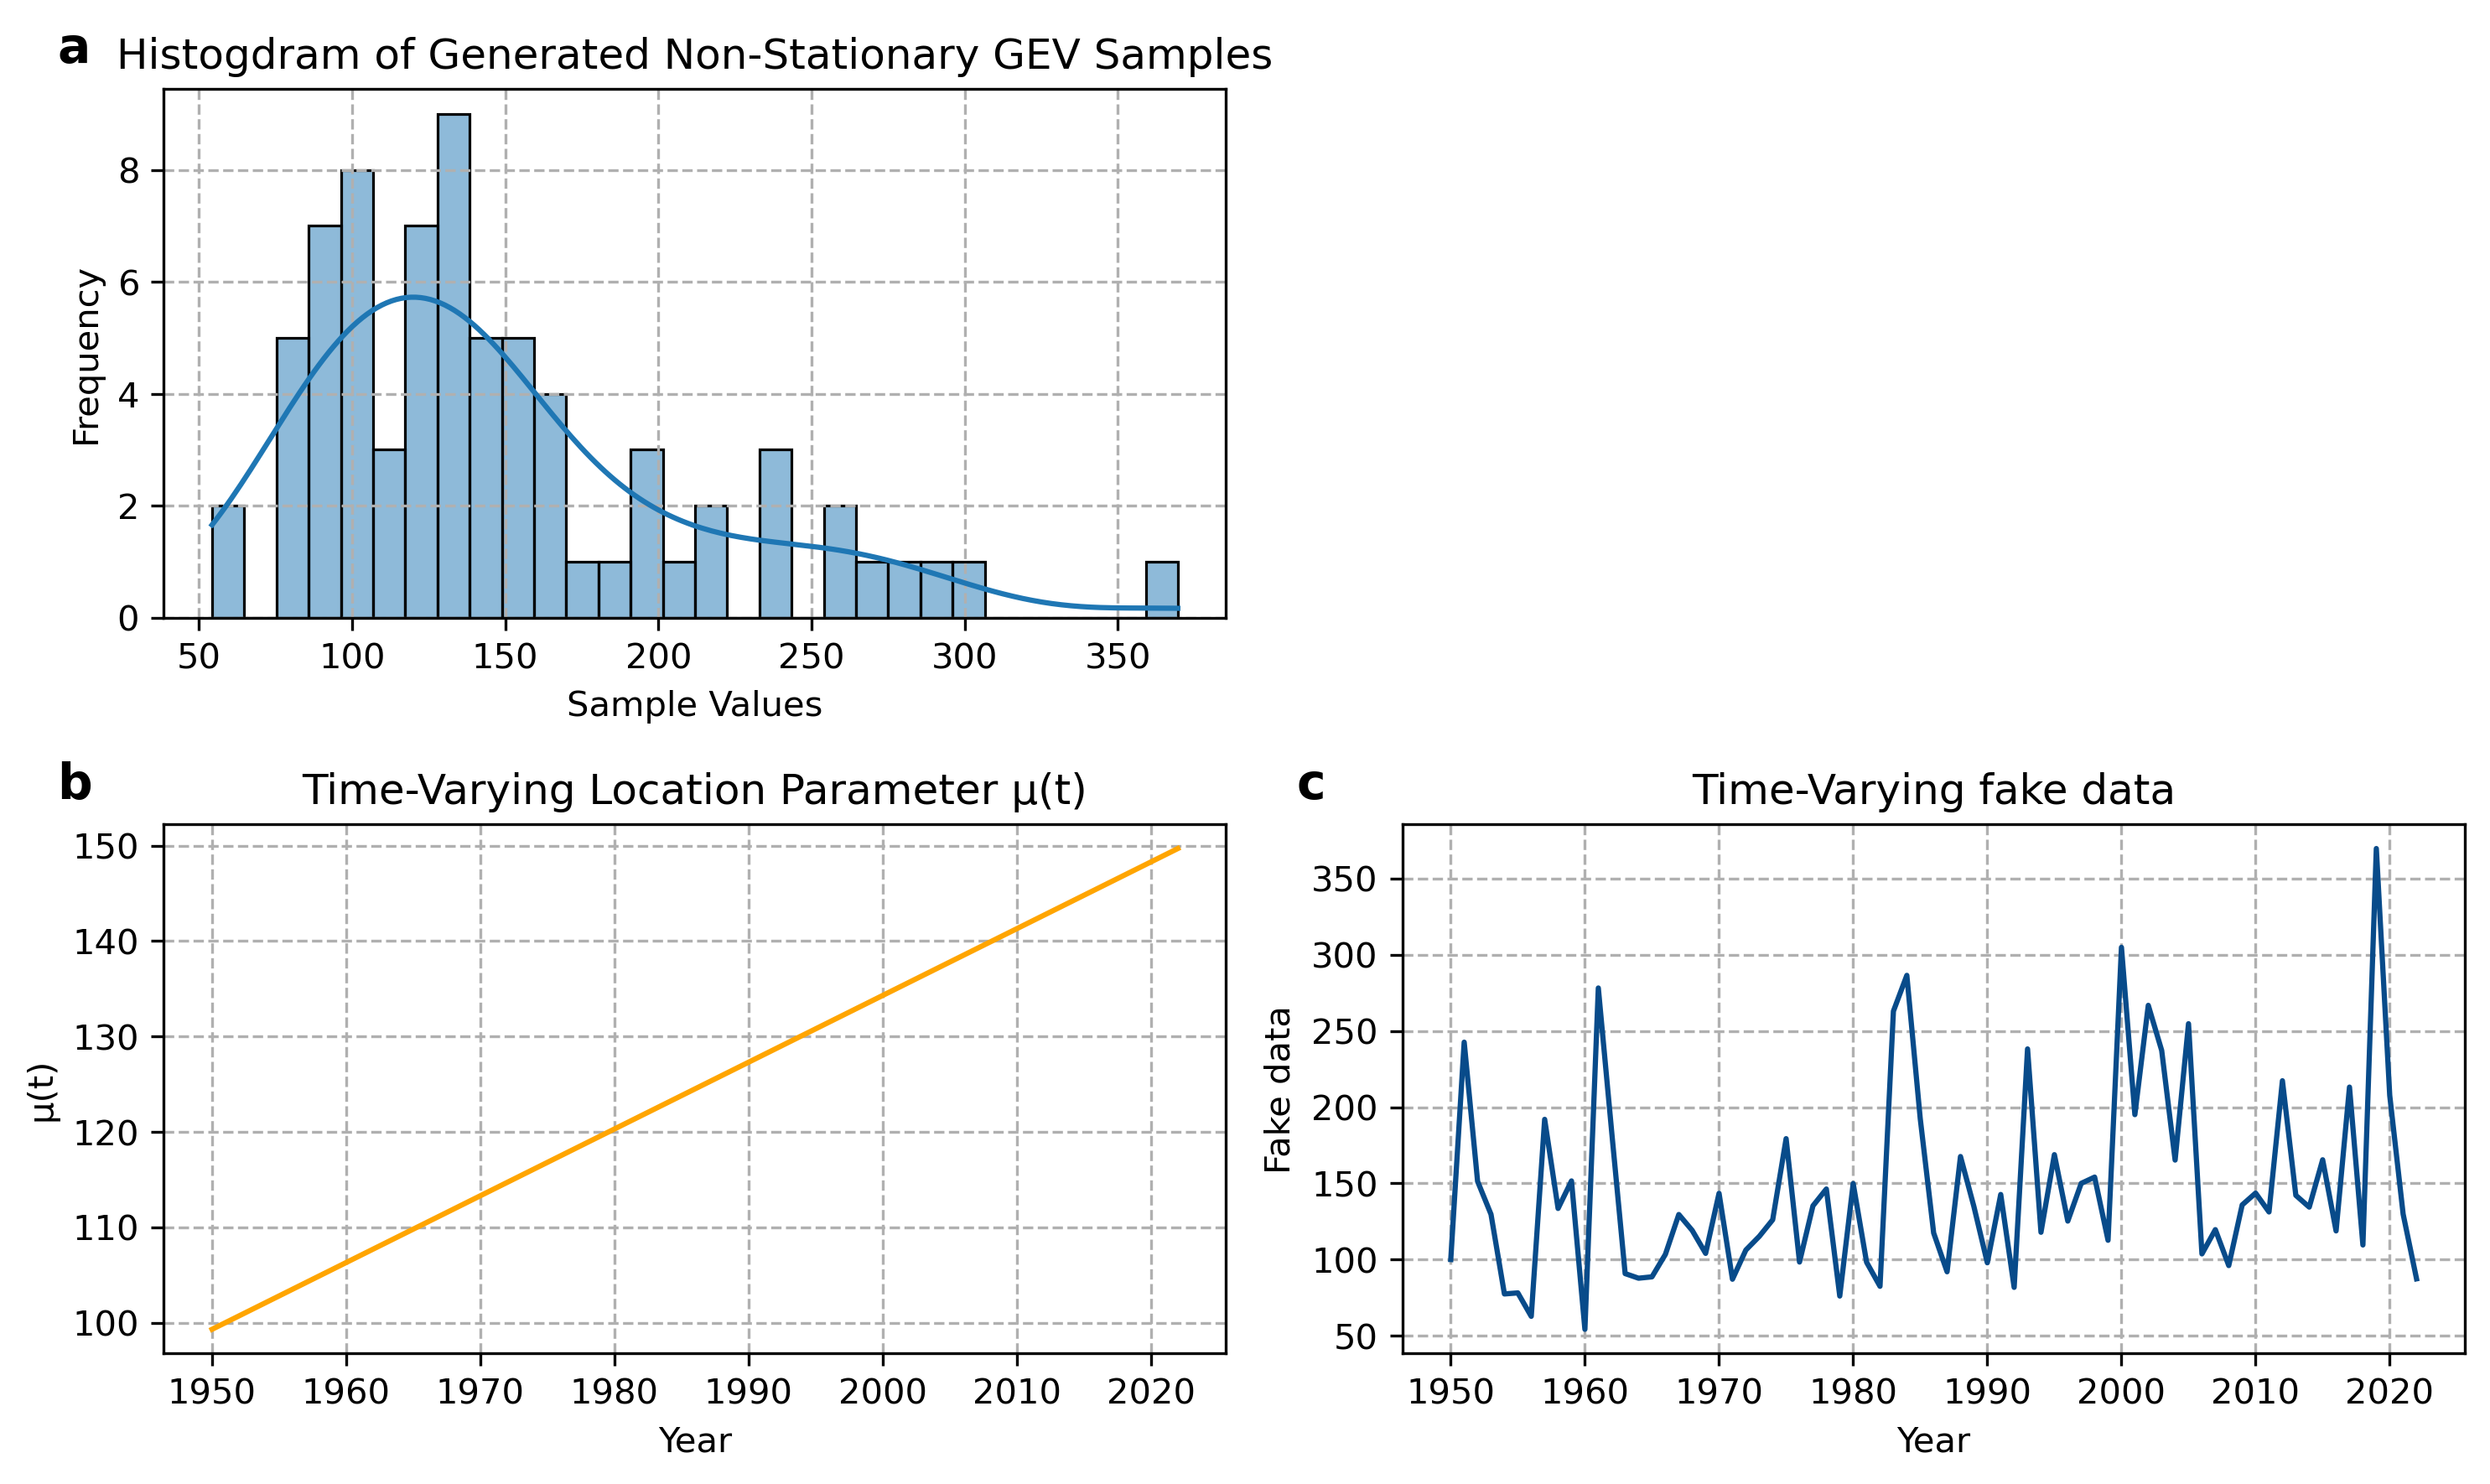

In [126]:

# Descriptive Statistics
mean_fake_data = np.mean(fake_data)
std_fake_data = np.std(fake_data)
print(f'Sample mean: {mean_fake_data}')
print(f'Sample std: {std_fake_data}')

fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi=300)

# Left-top: Histogram with KDE
sns.histplot(fake_data, bins=30, kde=True, ax=ax[0,0])
ax[0,0].set_title("Histogdram of Generated Non-Stationary GEV Samples")
ax[0,0].set_xlabel("Sample Values")
ax[0,0].set_ylabel("Frequency")
ax[0,0].grid(ls='--')

# Adding "a" label to the top-left corner
ax[0,0].text(-0.1, 1.05, 'a', transform=ax[0,0].transAxes, fontsize=14, fontweight='bold')

# Bottom-left: Time-varying μ(t)
ax[1,0].plot(t, cmu*(t-1950)+mu0, color='orange')
ax[1,0].set_title("Time-Varying Location Parameter μ(t)")
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("μ(t)")
ax[1,0].grid(ls='--')

# Adding "b" label to the top-left corner
ax[1,0].text(-0.1, 1.05, 'b', transform=ax[1,0].transAxes, fontsize=14, fontweight='bold')

# Bottom-right: Time-varying fake data
ax[1,1].plot(t, fake_data, color='#084b8a')
ax[1,1].set_title("Time-Varying fake data")
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Fake data")
ax[1,1].grid(ls='--')

# Adding "c" label to the top-left corner
ax[1,1].text(-0.1, 1.05, 'c', transform=ax[1,1].transAxes, fontsize=14, fontweight='bold')

# Turn off top-right subplot
ax[0,1].axis('off')

plt.tight_layout()
plt.show()


## 3. (20 points) Write a function to calculate the negative log-likelihood
As a first step to maximum likelihood, we need to be able to calculate the likelihood ℒ. Note, however, that maximum likelihood methods rarely use the likelihood itself, since it involves products of lots of tiny numbers (this is a sure recipe for having round-off problems even with double precision numbers). Instead, maximum likelihood methods typically use the negative of the log of the likelihood; the use of log transforms tiny numbers into much larger values, and the use of the negative sign allows for already-existing function minimization methods to be used (instead of maximization).

Recall that the likelihood L for a given set of data x = [x1, x2, x3, ...] is defined as follows:

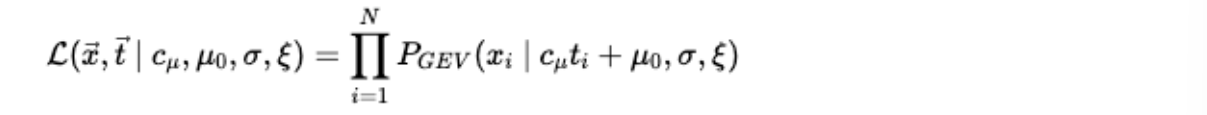

Write a function to calculate the negative of the log-likelihood of a set of data, given a set of nonstationary GEV parameters. The function should be called like gev_ns_log_likelihood(params, x, t), where params is an array of nonstationary GEV distribution parameters. (The reason for this will become clear in the next problem; I’m saving you time here.)

Using the ‘fake data’ generation function written a above (and the parameters used in problem 2), verify that the likelihood function works as expected.

Hints: * It may be useful to consider some common identities associated with logarithms. * If you fix the values of σ, μ0, and ξ at their known values in the likelihood function, but you allow cμ to vary, what should a graph of  − log(ℒ) vs cmu look like?

##### Likelihood function

The likelihood function can be expressed as:

$$
L(\text{cmu}, \mu_0, \sigma, \xi \mid x_1, x_2, \ldots, x_n) = \prod_{i=1}^{n} f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi)
$$

##### Log-likelihood function

Then, the log-likelihood function can be written as:

$$
\ln L(\text{cmu}, \mu_0, \sigma, \xi \mid x_1, x_2, \ldots, x_n) = \ln \left( \prod_{i=1}^{n} f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi) \right)
$$

Using the properties of logarithms, we get:

$$
\ln L(\text{cmu}, \mu_0, \sigma, \xi \mid x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n} \ln f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi)
$$

So calculating the maximum likelihood is to calculate the parameters $(\text{cmu}, \mu_0, \sigma, \xi)$ when $\sum_{i=1}^{n} \ln f(x_i \mid \text{cmu}, \mu_0, \sigma, \xi)$ is the maximum value.

Since most optimization algorithms (such as gradient descent) are designed to find minima, the objective function is formulated in a way that needs to be minimized. Thus, the negative log-likelihood function is chosen for minimization.

In [127]:
def gev_ns_log_likelihood(params, x, t):
    """
    Calculate the negative log-likelihood for non-stationary GEV given data.
    
    Parameters:
    params : array-like, [cmu, mu0, sigma, xi] non-stationary GEV parameters
    x : array-like, observed data
    t : array-like, time values corresponding to data x (must have the same shape as x)
    
    Returns:
    neg_log_lik : float, negative log-likelihood
    """
    # Extract parameters
    cmu, mu0, sigma, xi = params
    
    # Compute the PDF values based on the non-stationary GEV PDF
    pdf_values = gevf.gev_ns_pdf(x, t, cmu, mu0, sigma, xi)
    
    # Calculate negative log-likelihood, handling zero pdf values to avoid log(0)
    neg_log_lik = -np.sum(np.log(pdf_values + 1e-5))  # adding a small constant to avoid log(0)
    return neg_log_lik

In [128]:
cmu = 0.7
sigma = 41
xi = 0.1
mu0 = 100 - cmu * 1

params = [cmu, mu0, sigma, xi]
likelihood_sample = gev_ns_log_likelihood(params, fake_data, t-1950)
print(f"Negative log-likelihood (cmu=0.7, sigma=41, xi=0.1, mu0=100): {likelihood_sample}")

Negative log-likelihood (cmu=0.7, sigma=41, xi=0.1, mu0=100): 390.80629670795344


If sigma, mu_0, and xi in the likelihood function are fixed at known values, while allowing the variation  mu to be related to a certain factor cmu, the plot of -log(L) (negative log-likelihood function) as a function of cmu will typically resemble a parabolic shape.

**Reason:**
- **Maximum Likelihood Estimation:** When \( cmu \) is far from the optimal value, the likelihood function decreases rapidly, resulting in an increase in \( -log(L) \). Therefore, the minimum occurs at (or near) \( cmu \), corresponding to the best parameter estimate.
  
- **Convexity:** Since the log-likelihood function is often a convex function, particularly when there is only one degree of freedom in the parameter variation, \( -log(L) \) typically displays a “U”-shaped curve. 

As a result, as \( cmu \) increases, \( -log(L) \) initially decreases to a minimum and then rises again, forming a symmetric or nearly symmetric parabolic curve.

The minimum point of this curve corresponds to the optimal value of \( cmu \) given the other parameters.



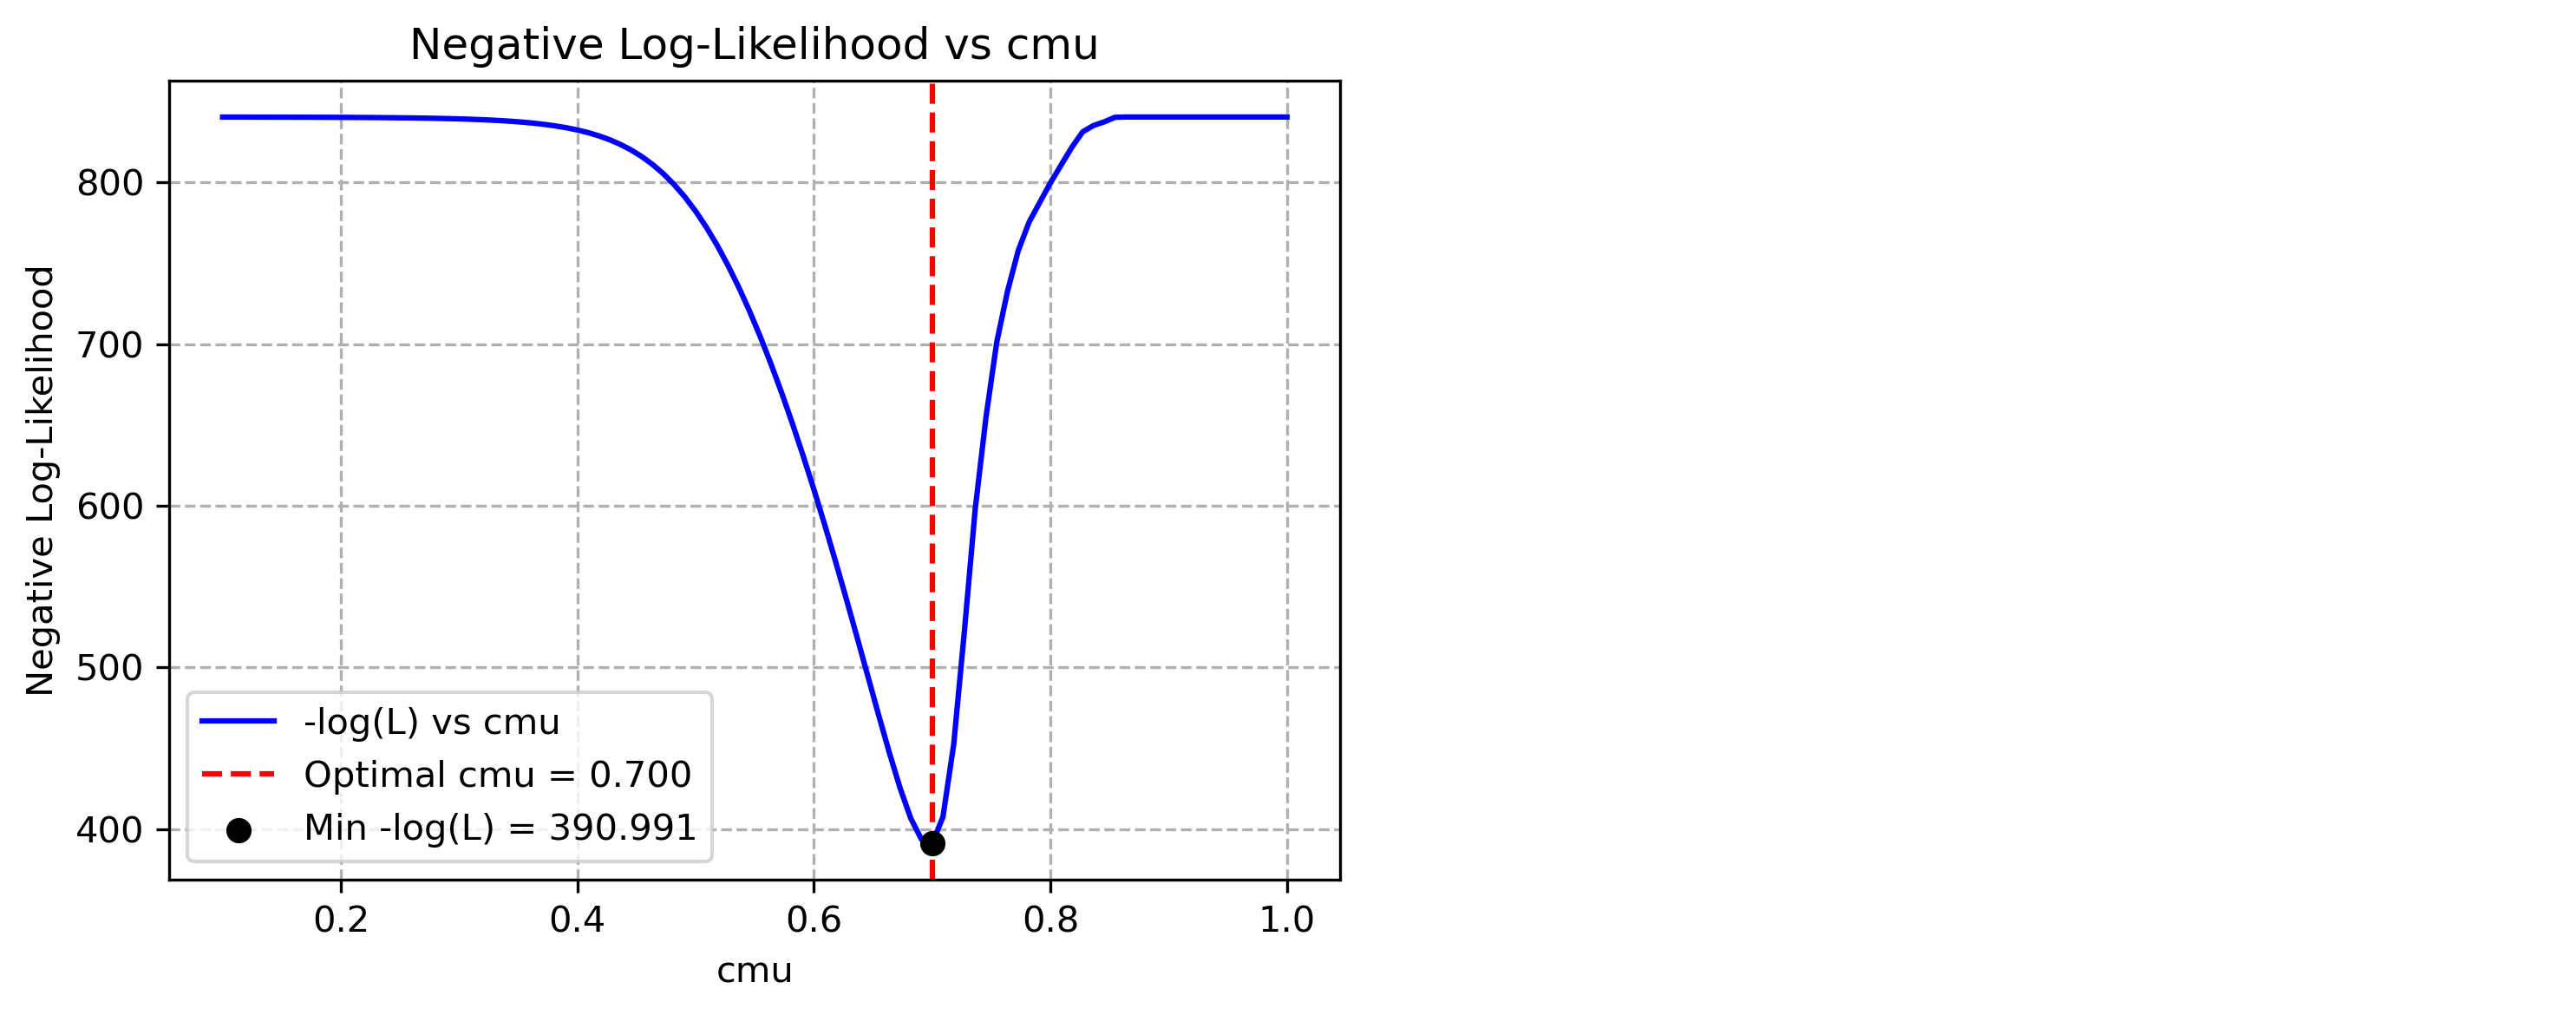

In [129]:
cmu, sigma, xi = 0.7, 41, 0.1  # Given parameters
mu0 = 100 - cmu * 1950  # Set mu0 to achieve a location value of 100 at t = 1950

# Calculate negative log-likelihood across a range of cmu values
cmu_values = np.linspace(0.1, 1.0, 100)
nll_values_corrected = [gev_ns_log_likelihood([c, mu0, sigma, xi], fake_data, t) for c in cmu_values]

# Identify the minimum negative log-likelihood and corresponding cmu value
min_nll = min(nll_values_corrected)
optimal_cmu = cmu_values[np.argmin(nll_values_corrected)]

# Plot -log(L) vs cmu 
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300)
ax[0].plot(cmu_values, nll_values_corrected, color='b', label="-log(L) vs cmu")
ax[0].axvline(optimal_cmu, color='r', linestyle='--', label=f"Optimal cmu = {optimal_cmu:.3f}")
ax[0].scatter(optimal_cmu, min_nll, color='k', label=f"Min -log(L) = {min_nll:.3f}", zorder=2)
ax[0].set_xlabel("cmu")
ax[0].set_ylabel("Negative Log-Likelihood")
ax[0].set_title("Negative Log-Likelihood vs cmu")
ax[0].legend()
ax[0].grid(ls='--')
ax[1].axis('off')

plt.tight_layout()
plt.show()



## 4. (20 points) Write a function for finding the maximum likelihood
Now that we have a good, working likelihood (negative log likelihood, actually) function, we can now use it to calculate maximum likelihood (or minimum of the negative log likelihood). For this problem, it is okay (and in fact recommended) to use existing optimization packages, like scipy.optimize.minimize() in python or fminsearch() in matlab.

Write a function to estimate the maximum likelihood set of parameters of a given set of data. It should return the parameter estimates as well as the likelihood value.

It should be called like gev_ns_mle(x, t, param0, bounds), where x and t are your data values and times respectively, and params0 is an array of initial guesses for the nonstationary GEV distribution parameters.

Verify that this function works as expected.

Hints:

- You might want to generate samples for a range of cμ values and show your estimated cμ values versus their calculated values.
- If you need to modify your negative log-likelihood function for this problem, make sure to re-run your test(s) from Problem 3 above.
- How might you deal with the issue that the GEV distribution’s definition is discontinuous at ξ = 0?

In [130]:
import numpy as np
from scipy.optimize import minimize

def gev_ns_mle(x, t, param0, bounds):
    """
    Estimate the maximum likelihood parameters for non-stationary GEV distribution.
    
    Parameters:
    x : array-like, the observed data.
    t : array-like, the time variable corresponding to each observation in x.
    param0 : array-like, initial guesses for the GEV parameters [xi, mu0, cmu, sigma].
    bounds : list of tuples, bounds for each parameter [(min1, max1), (min2, max2), ...].
    
    Returns:
    result : OptimizeResult, the result of the optimization process.
    param_estimates : array, estimated parameters [xi, mu0, cmu, sigma].
    neg_log_lik : float, the negative log-likelihood of the estimated parameters.
    """
    
    # Define the optimization objective (negative log-likelihood)
    def objective(params):
        return gev_ns_log_likelihood(params, x, t)

    # Run the optimization using scipy's minimize function
    result = minimize(objective, param0, bounds=bounds)

    # Extract the parameter estimates and negative log-likelihood
    param_estimates = result.x
    neg_log_lik = result.fun
    
    return neg_log_lik, param_estimates


In [131]:

param0 = [0.7, np.mean(fake_data), np.std(fake_data), 0.1]  # [cmu, mu0, sigma, xi] 
bounds = [(0, 2), (None, None), (0.1, None), (None, None)]  # bounds for [cmu, mu0, sigma, xi] 

# Run the maximum likelihood estimation
neg_log_lik, param_estimates = gev_ns_mle(fake_data, t-1950, param0, bounds)

# Print the results
print("Negative Log-Likelihood:", neg_log_lik)
print("Fitted GEV Parameters:")
print("cmu =", param_estimates[0])
print("mu0 =", param_estimates[1])
print("sigma =", param_estimates[2])
print("xi =", param_estimates[3])

Negative Log-Likelihood: 389.46455974944695
Fitted GEV Parameters:
cmu = 0.5595677702076706
mu0 = 96.7106302126223
sigma = 37.891228427811434
xi = 0.20797008859214008


1. Threshold for ξ: I added a small threshold (ξ_threshold = 1e-5) to handle cases where ξ is close to zero (please refer to `gev_ns_log_likelihood(params, x, t)`). If ξ is near zero, it’s set to this threshold value with the same sign as the original ξ to avoid discontinuity.
2. No Separate Case for Zero ξ: This helps improve computational stability and avoids errors caused by discontinuity.

## 5. (20 points) use your mle method on the data from hw2
1. load and plot the csv data in /home/data/risser2019_figure1.csv (the first column is year, the second column is rx7day [mm]; there is a header row). also plot a pdf of the rx7day values.

2. use your maximum likelihood method to estimate the parameters of the non-stationary distribution

3. plot time vs rx7day along with time t vs q(q, t | cμ, μ0, σ, ξ) for q = 0.1, q = 0.5, and q = 0.9 (i.e., plot a timeseries of the quantiles using cμ and the values of μ0, σ, and ξ determined above.)

4. calculate the percentage change in μ(t) between 1950 and 2017. how does this compare to the values reported in table 1 of risser et al., and why might it differ?

note: you’re welcome to copy large blocks of code from your own original hw2.

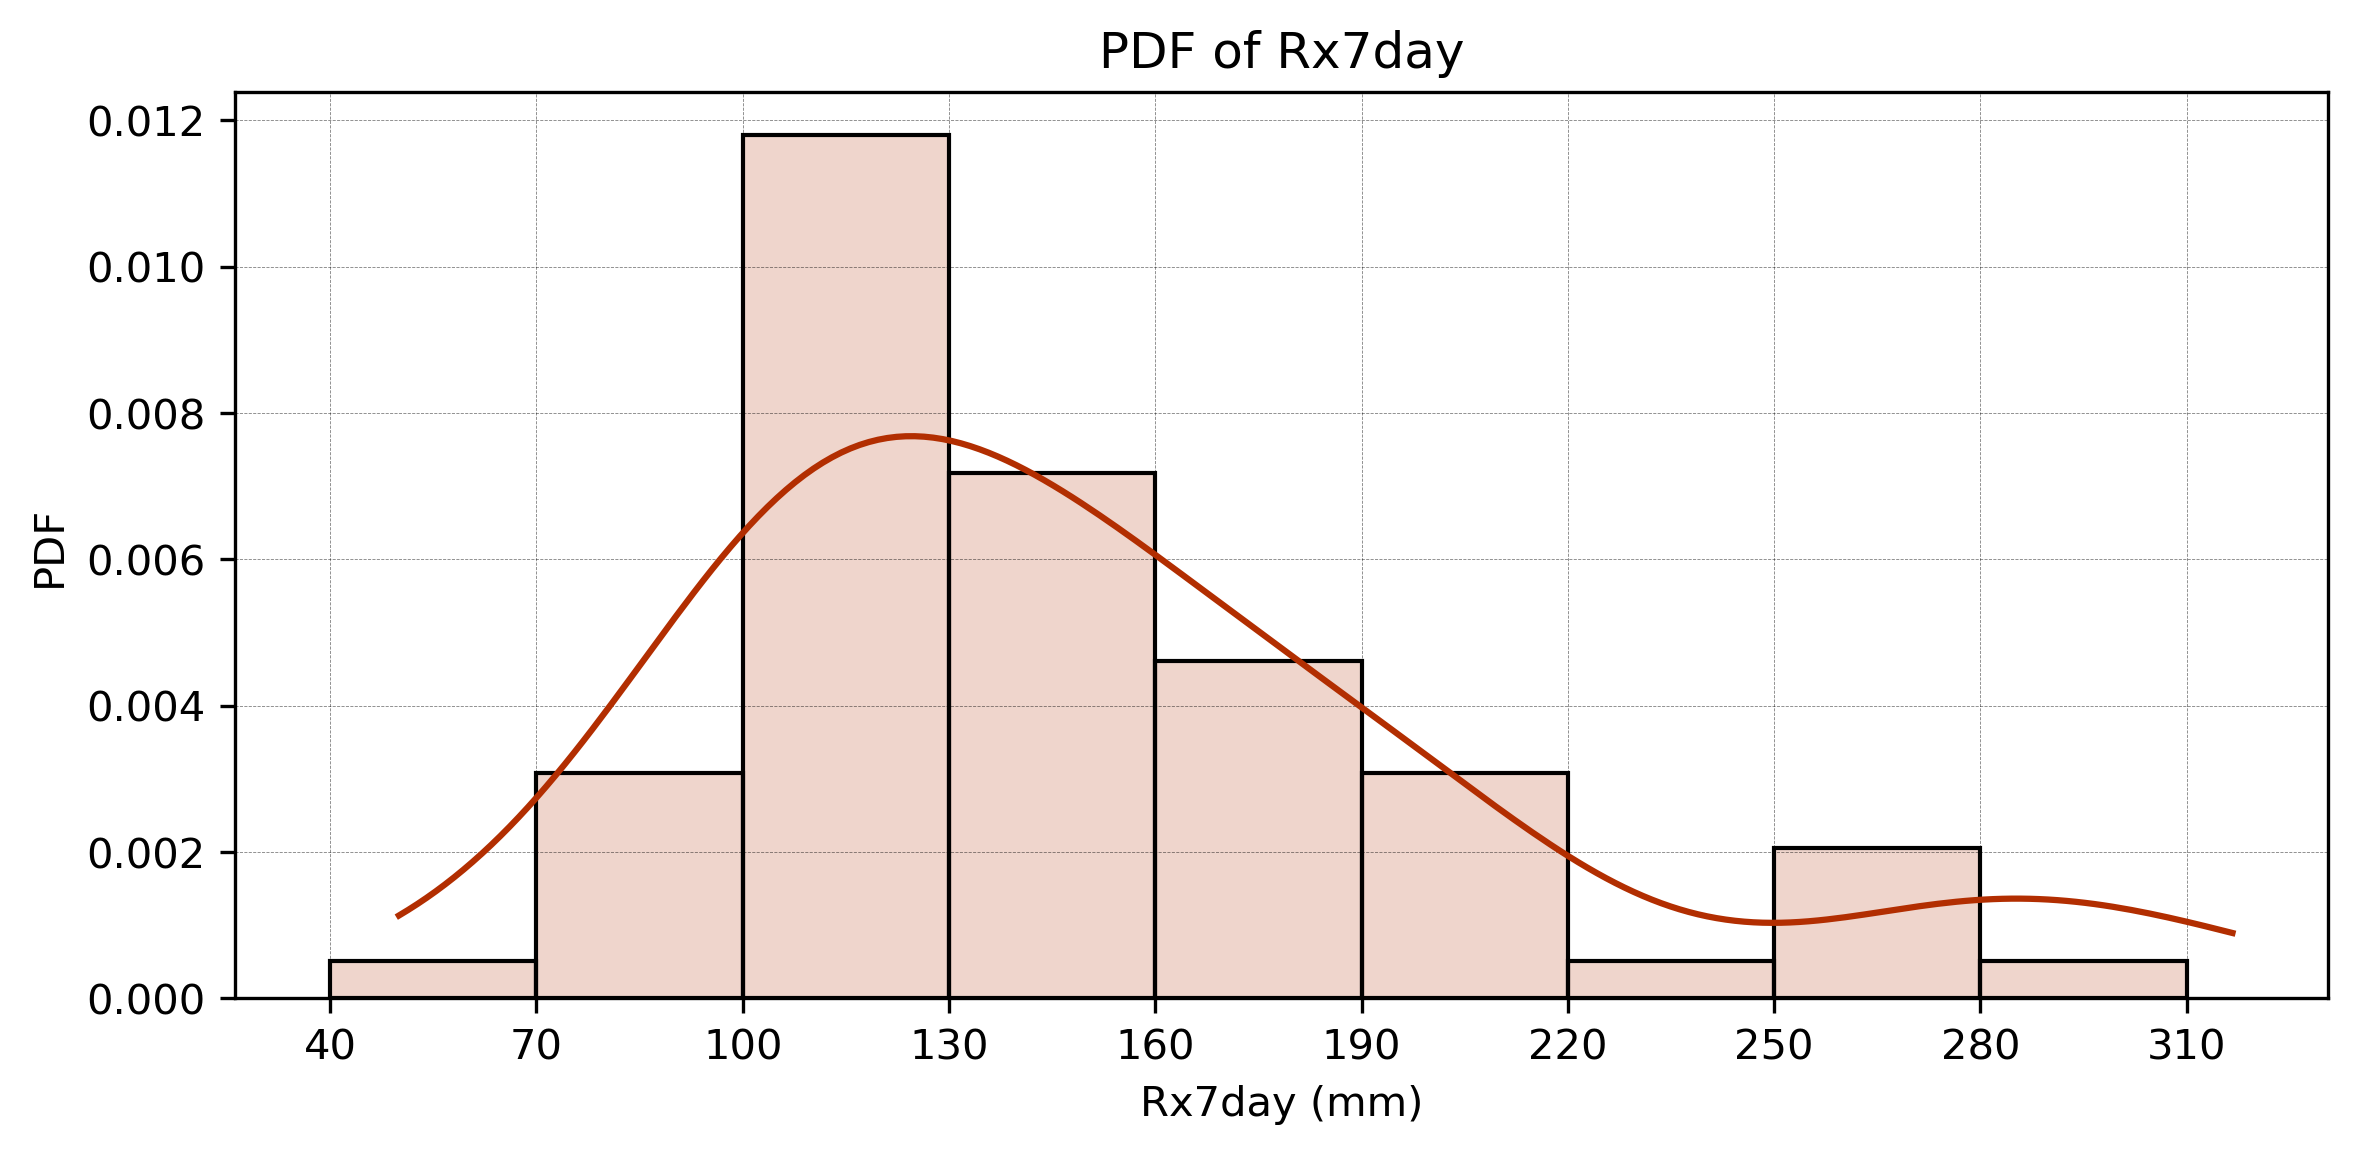

In [132]:
df = pd.read_csv('/home/data/Risser2019_Figure1.csv')  # R and F should be capital

fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300)

bins = [40, 70, 100, 130, 160, 190, 220, 250, 280, 310, ]
sns.histplot(df[' Rx7day'], kde=True, color='#b22e01', bins=bins, alpha=0.2, stat='density')

ax.grid(linestyle='--', linewidth=0.2, alpha=0.5, color='k')
ax.set_title('PDF of Rx7day')
ax.set_xlabel('Rx7day (mm)')
ax.set_ylabel('PDF') 
ax.set_xticks(bins)

plt.show()

In [133]:
initial_params = [0.1, np.mean(df[' Rx7day'].values), np.std(df[' Rx7day'].values), 0.1] # [cmu, mu0, sigma, xi] 
bounds = [(0, 2), (None, None), (0.1, None), (None, None)]  # bounds for [cmu, mu0, sigma, xi] 
neg_log_lik, param_estimates = gev_ns_mle(df[' Rx7day'].values, df['# Year']-1950, initial_params, bounds)

In [134]:
print("Negative Log-Likelihood:", neg_log_lik)
print("Fitted GEV Parameters:")
print("cmu =", param_estimates[0])
print("mu0 =", param_estimates[1])
print("sigma =", param_estimates[2])
print("xi =", param_estimates[3])

Negative Log-Likelihood: 356.2157813792636
Fitted GEV Parameters:
cmu = 0.7115352840927793
mu0 = 103.31657044305639
sigma = 40.38561033757556
xi = 0.06316702869065868


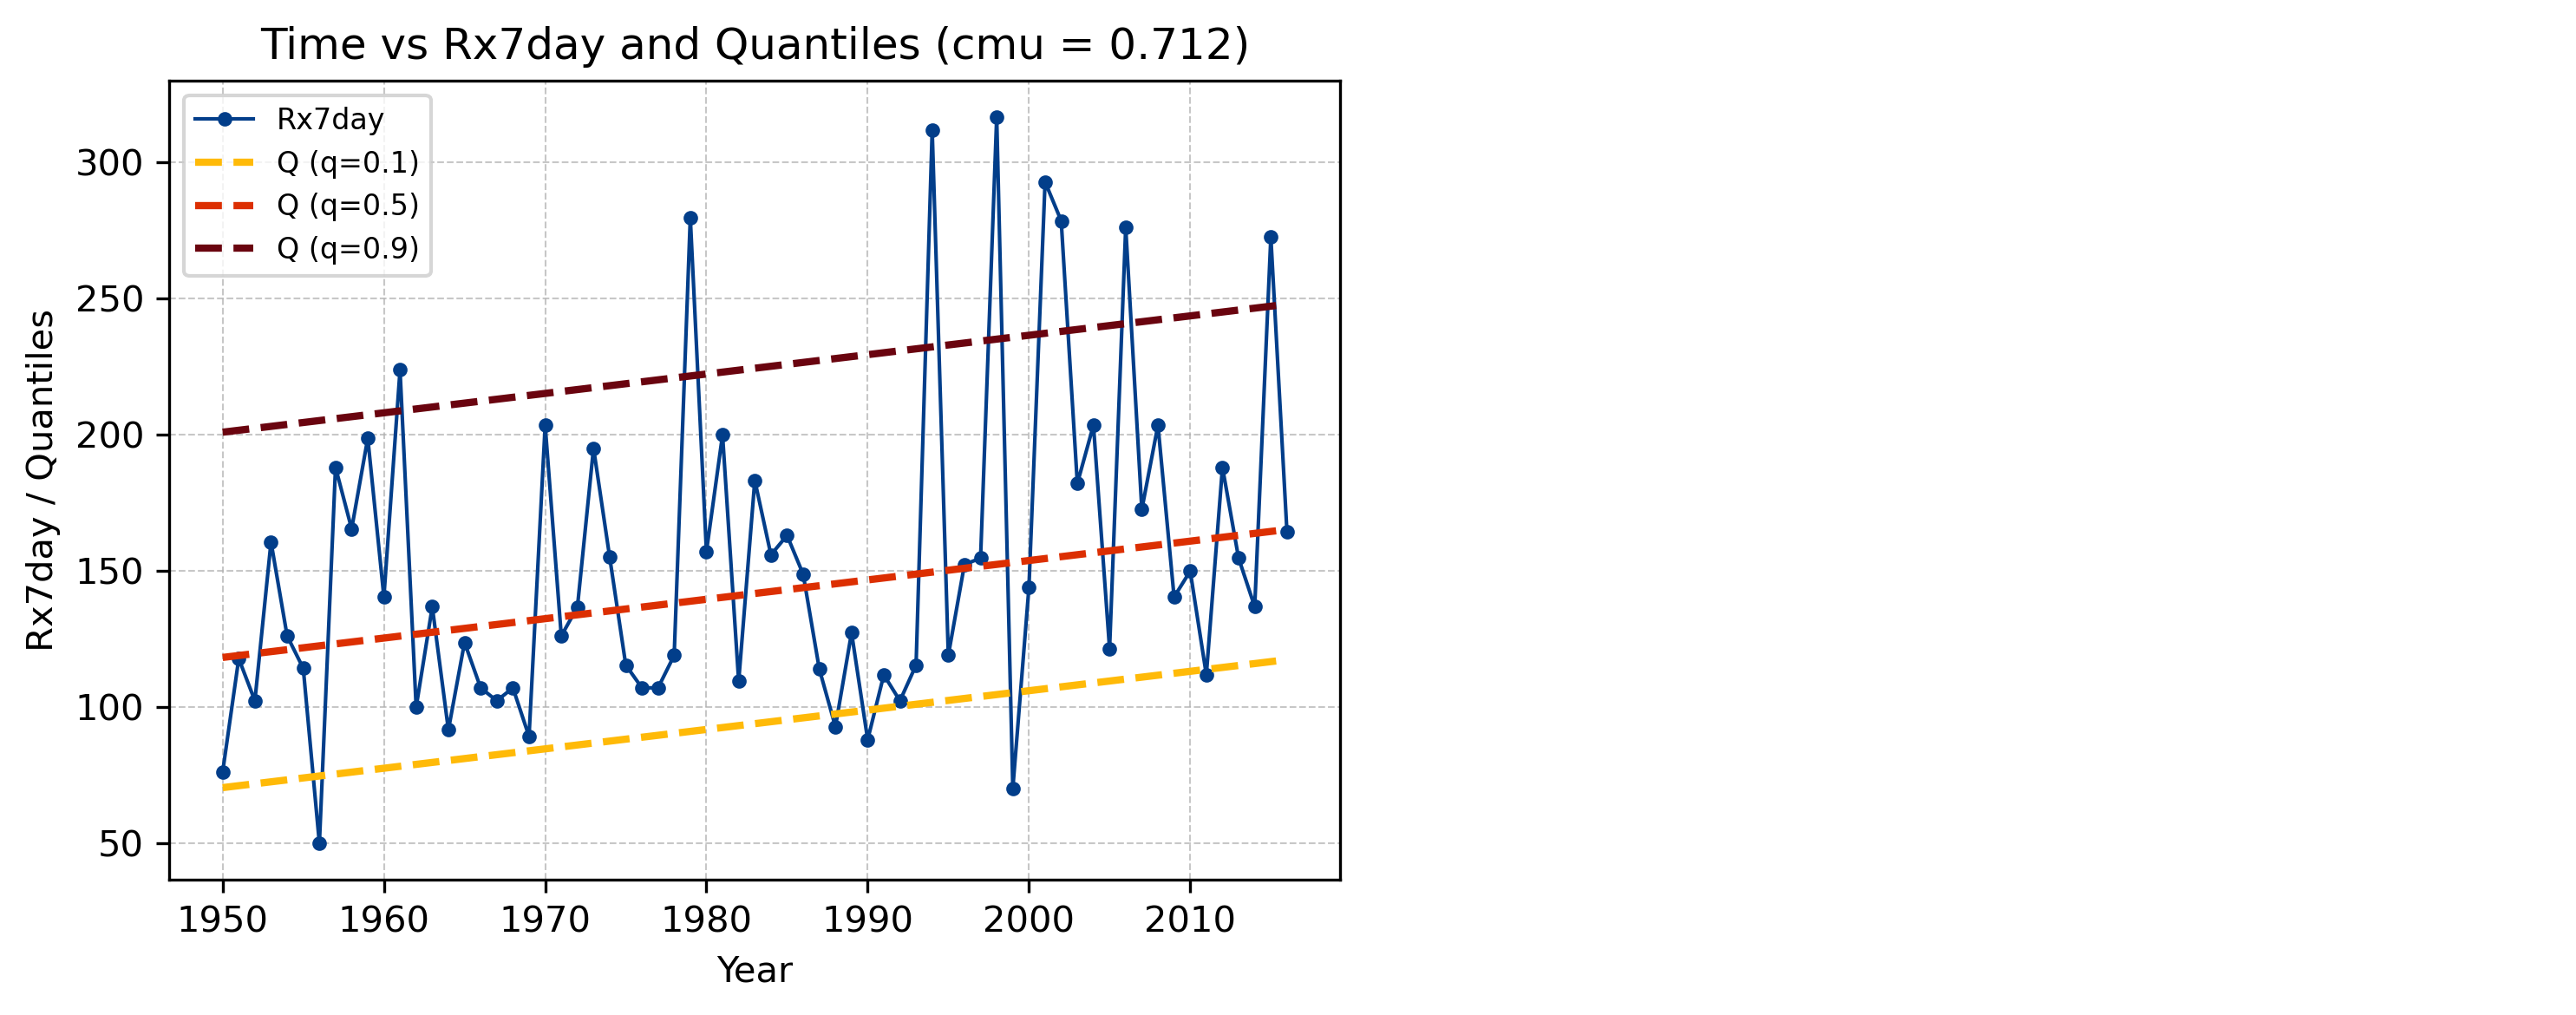

In [135]:
t = df['# Year']-1950 # Converted to 0-66 years
q_values = [0.1, 0.5, 0.9] 

quantiles = {q: gevf.gev_ns_quantile(q, t, param_estimates[0], param_estimates[1], param_estimates[2], param_estimates[3]) for q in q_values} # Calculate quantiles

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=300) 
ax[0].plot(t, df[' Rx7day'], label="Rx7day", color='#023e8a', marker='o',ms=3,lw=1, linestyle='-')

colors = ['#ffba08', '#dc2f02', '#6a040f']
for i, q in enumerate(q_values):
    ax[0].plot(t, quantiles[q], label=f"Q (q={q})", color=colors[i],lw=2, linestyle='--')

ax[0].set_title(f"Time vs Rx7day and Quantiles (cmu = {param_estimates[0]:.3f})")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rx7day / Quantiles")
ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax[0].legend(loc="upper left", prop={'size': 8})
ax[0].set_xticks(np.arange(0, 67, 10))  
ax[0].set_xticklabels(np.arange(1950, 2018, 10))  
ax[1].axis('off')
plt.tight_layout()
plt.show()

In [136]:
# Calculate μ(t) for 1950 and 2017
mu0 = param_estimates[1]
mu_1950 = cmu + mu0
mu_2017 = cmu * 68+ mu0 # 68 represents 68 years from 1950 to 2017

# Calculate the percentage change
percentage_change = ((mu_2017 - mu_1950) / mu_1950) * 100
print(f"Percentage Change in μ(t) between 1950 and 2017: {percentage_change:.2f}%")


Percentage Change in μ(t) between 1950 and 2017: 45.09%


My result is  higher than the percentage change reported by Risser et al. This difference could be due to the following reasons:

1. **Model differences**: My analysis may be based on a different non-stationary GEV model parameterization, whereas Risser et al. used a non-stationary GEV model with CO₂ and Niño3.4 as covariates. These different model structures and parameterizations could lead to variations in the estimated rate of change.

2. **External influencing factors**: Risser et al.'s study accounts for natural variability factors such as ENSO (El Niño-Southern Oscillation) and attempts to isolate the effects of anthropogenic climate change. This natural variability may alter precipitation patterns across different years, thereby affecting the estimation of extreme event growth.